# Loading Dataset & Importing Required Libraries and Functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import metrics

warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

sns.set_palette("Set2")

df = pd.read_csv("melbourneHousing.csv")
dff = df.copy()

# 1. Exploratory Data Analysis

# 1.1 Data Overview

In [2]:
dff.shape

(34857, 21)

In [3]:
dff.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,2.00,1.00,1.00,126.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,3.00,2.00,1.00,0.00,NaN,NaN,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
5,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,NaN,NaN,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
6,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.50,3067.00,3.00,2.00,2.00,400.00,220.00,2006.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.50,3067.00,4.00,1.00,2.00,201.00,NaN,1900.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.50,3067.00,3.00,2.00,1.00,202.00,NaN,1900.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00


In [4]:
dff.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.00,PI,Jas,24/02/2018,6.30,3013.00,4.00,1.00,3.00,593.00,NaN,NaN,Maribyrnong City Council,-37.81,144.88,Western Metropolitan,6543.00
34853,Yarraville,29A Murray St,2,h,888000.00,SP,Sweeney,24/02/2018,6.30,3013.00,2.00,2.00,1.00,98.00,104.00,2018.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00
34854,Yarraville,147A Severn St,2,t,705000.00,S,Jas,24/02/2018,6.30,3013.00,2.00,1.00,2.00,220.00,120.00,2000.00,Maribyrnong City Council,-37.82,144.88,Western Metropolitan,6543.00
34855,Yarraville,12/37 Stephen St,3,h,1140000.00,SP,hockingstuart,24/02/2018,6.30,3013.00,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.00
34856,Yarraville,3 Tarrengower St,2,h,1020000.00,PI,RW,24/02/2018,6.30,3013.00,2.00,1.00,0.00,250.00,103.00,1930.00,Maribyrnong City Council,-37.82,144.89,Western Metropolitan,6543.00


In [5]:
dff.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
dff.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [7]:
dff.duplicated().sum()

1

In [8]:
dff.loc[dff.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.40,3131.00,3.00,3.00,2.00,405.00,226.00,2000.00,Manningham City Council,-37.83,145.17,Eastern Metropolitan,4973.00


In [9]:
dff.drop_duplicates(inplace=True)

In [10]:
dff.duplicated().sum().any()

False

In [11]:
dff.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [12]:
dff.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
Rooms,1.00,2.00,3.00,5.00,5.00,16.00
Price,85000.00,415000.00,870000.00,2250000.00,3400540.00,11200000.00
Distance,0.00,2.70,10.30,24.70,35.40,48.10
Postcode,3000.00,3015.00,3103.00,3204.00,3754.00,3978.00
Bedroom2,0.00,2.00,3.00,5.00,5.00,30.00
Bathroom,0.00,1.00,2.00,3.00,4.00,12.00
Car,0.00,0.00,2.00,4.00,5.00,26.00
Landsize,0.00,0.00,521.00,1001.00,2942.40,433014.00
BuildingArea,0.00,56.00,136.00,310.00,473.20,44515.00
YearBuilt,1196.00,1900.00,1970.00,2013.00,2016.00,2106.00


# 1.2 Categorical & Numerical Variable Analysis

In [13]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Provides the names of categorical, numeric, and categorical-like but cardinal variables in the dataset.
    Note: Numeric-looking categorical variables are also included in categorical variables.

    Parameters
    ------
    dataframe: dataframe
            DataFrame from which variable names are to be extracted.
    cat_th: int, optional
            Class threshold value for numeric but categorical variables.
    car_th: int, optional
            Class threshold value for categorical but cardinal variables.

    Returns
    ------
        cat_cols: list
                List of categorical variable names.
        num_cols: list
                List of numeric variable names.
        cat_but_car: list
                List of categorical-like but cardinal variable names.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
        

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables.
        num_but_cat is within cat_cols.
    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'Categorical Columns: {len(cat_cols)}')
    print(f'Numerical Columns: {len(num_cols)}')
    print(f'Cardinals: {len(cat_but_car)}')
    print(f'Numeric but Categoricals: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(dff, car_th=10)

Observations: 34856
Variables: 21
Categorical Columns: 3
Numerical Columns: 13
Cardinals: 5
Numeric but Categoricals: 0


In [14]:
cat_cols

['Type', 'Method', 'Regionname']

In [15]:
num_cols

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [16]:
cat_but_car

['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']

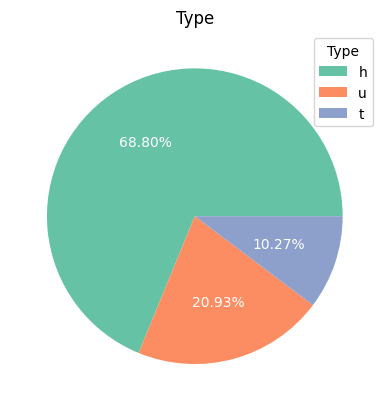

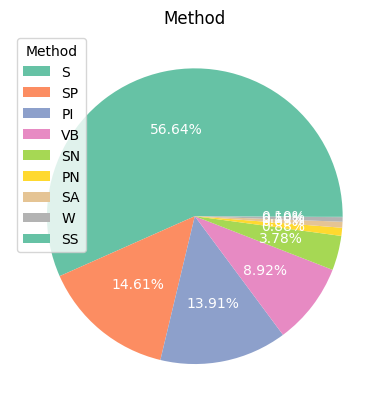

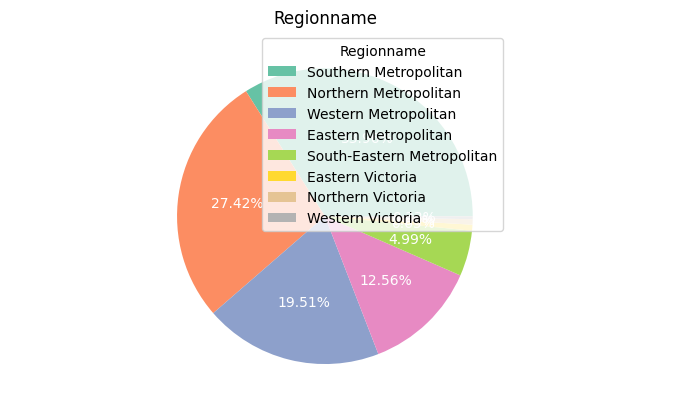

In [17]:
def cat_summary(dataframe, column, plot=True):
    value_counts = dataframe[column].value_counts()
    ratio = 100 * value_counts / len(dataframe)
    
    # visualized summary with pie chart
    if plot:
        y = value_counts.values
        labels = value_counts.index
        plt.title(f"{column}")
        plt.pie(y, labels=labels, autopct='%1.2f%%', textprops=dict(color="w"))
        plt.legend(title = f"{column}")
        plt.show()
        
    # documentation summary with dataframe
    else:
        summary_df = pd.DataFrame({column: value_counts,
                                   "Ratio": ratio})
        print(summary_df)
        
        
for col in cat_cols:
    cat_summary(dff, col, True)

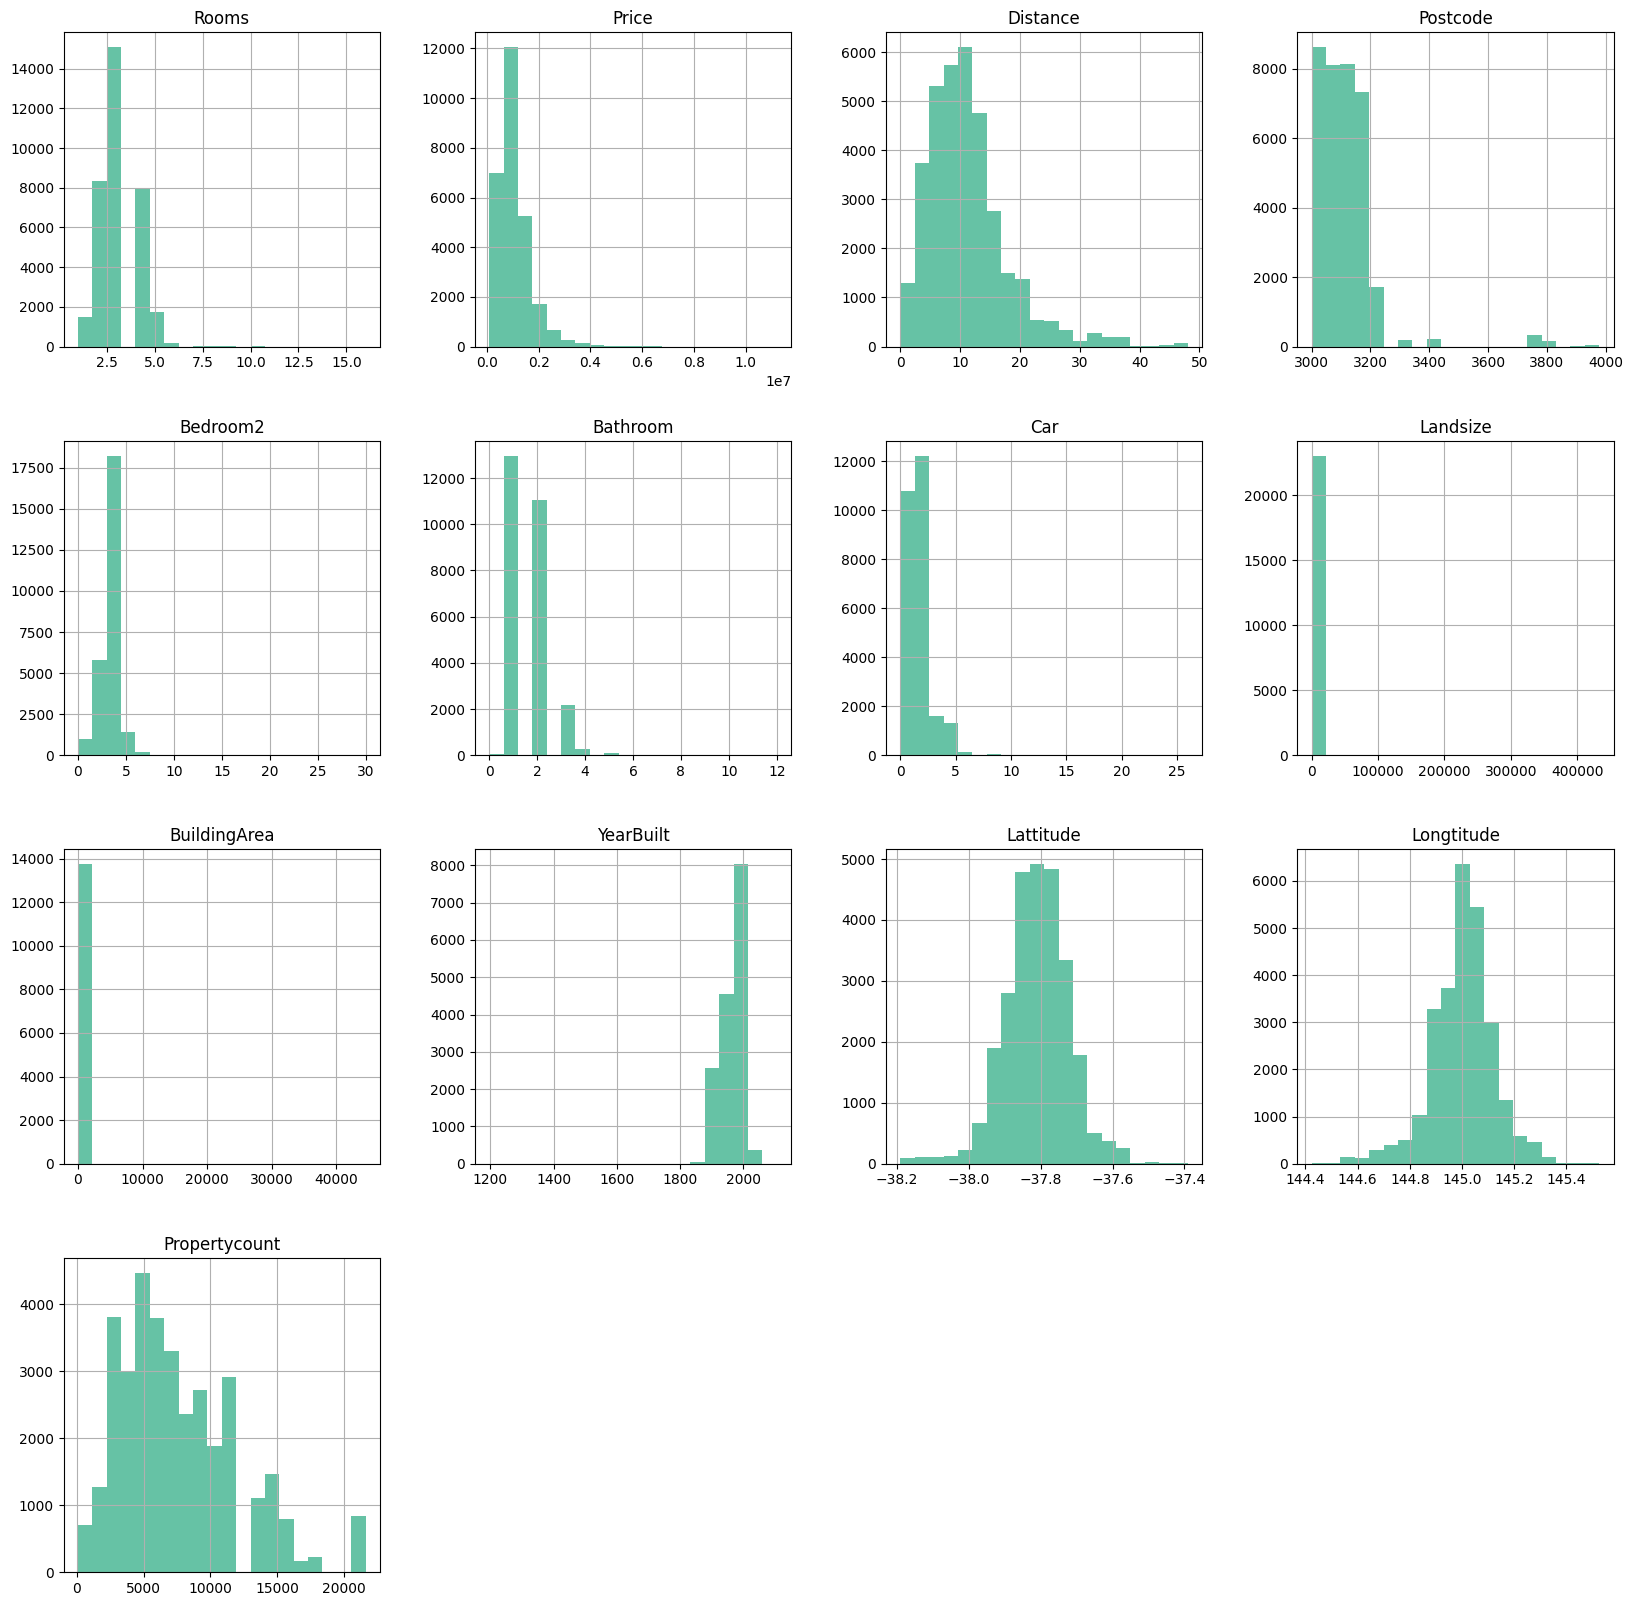

In [18]:
dff[num_cols].hist(bins=20, figsize=(20, 20))
plt.show()

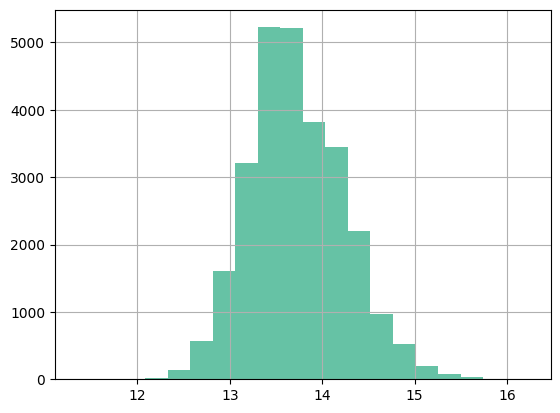

In [19]:
np.log1p(df['Price']).hist(bins=20)
plt.show()

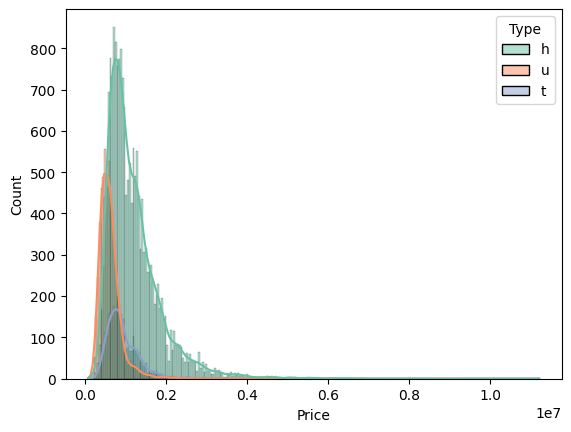

In [20]:
sns.histplot(x='Price', data=dff, kde=True, hue='Type')
plt.show()

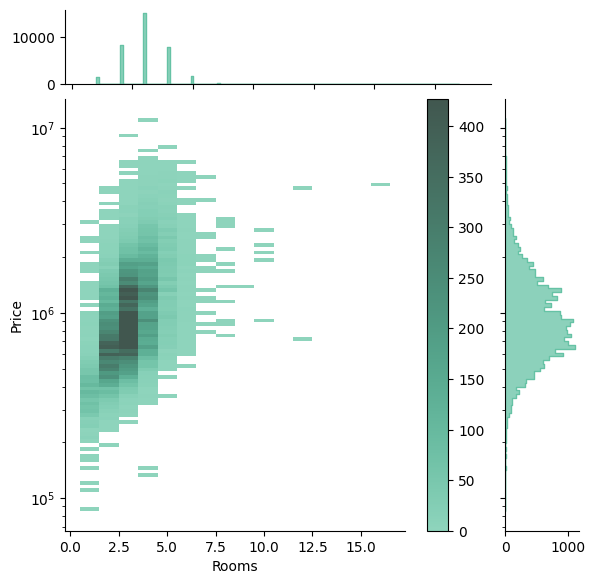

In [21]:
g = sns.JointGrid(data=dff, x="Rooms", y="Price", marginal_ticks=True)
g.ax_joint.set(yscale="log")

g.plot_joint(sns.histplot,
             discrete=(True, False),
             pmax=.8, cbar=True)

g.plot_marginals(sns.histplot, element="step")

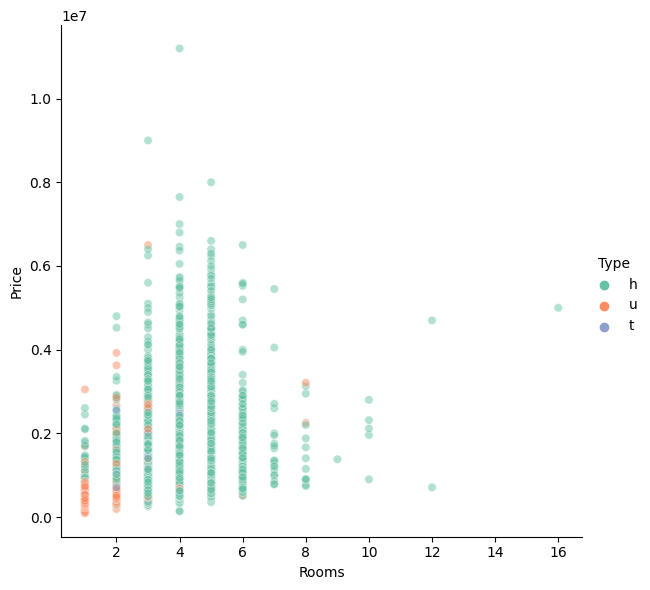

In [22]:
sns.relplot(x="Rooms", y="Price", hue="Type", alpha=.5, height=6, data=dff)

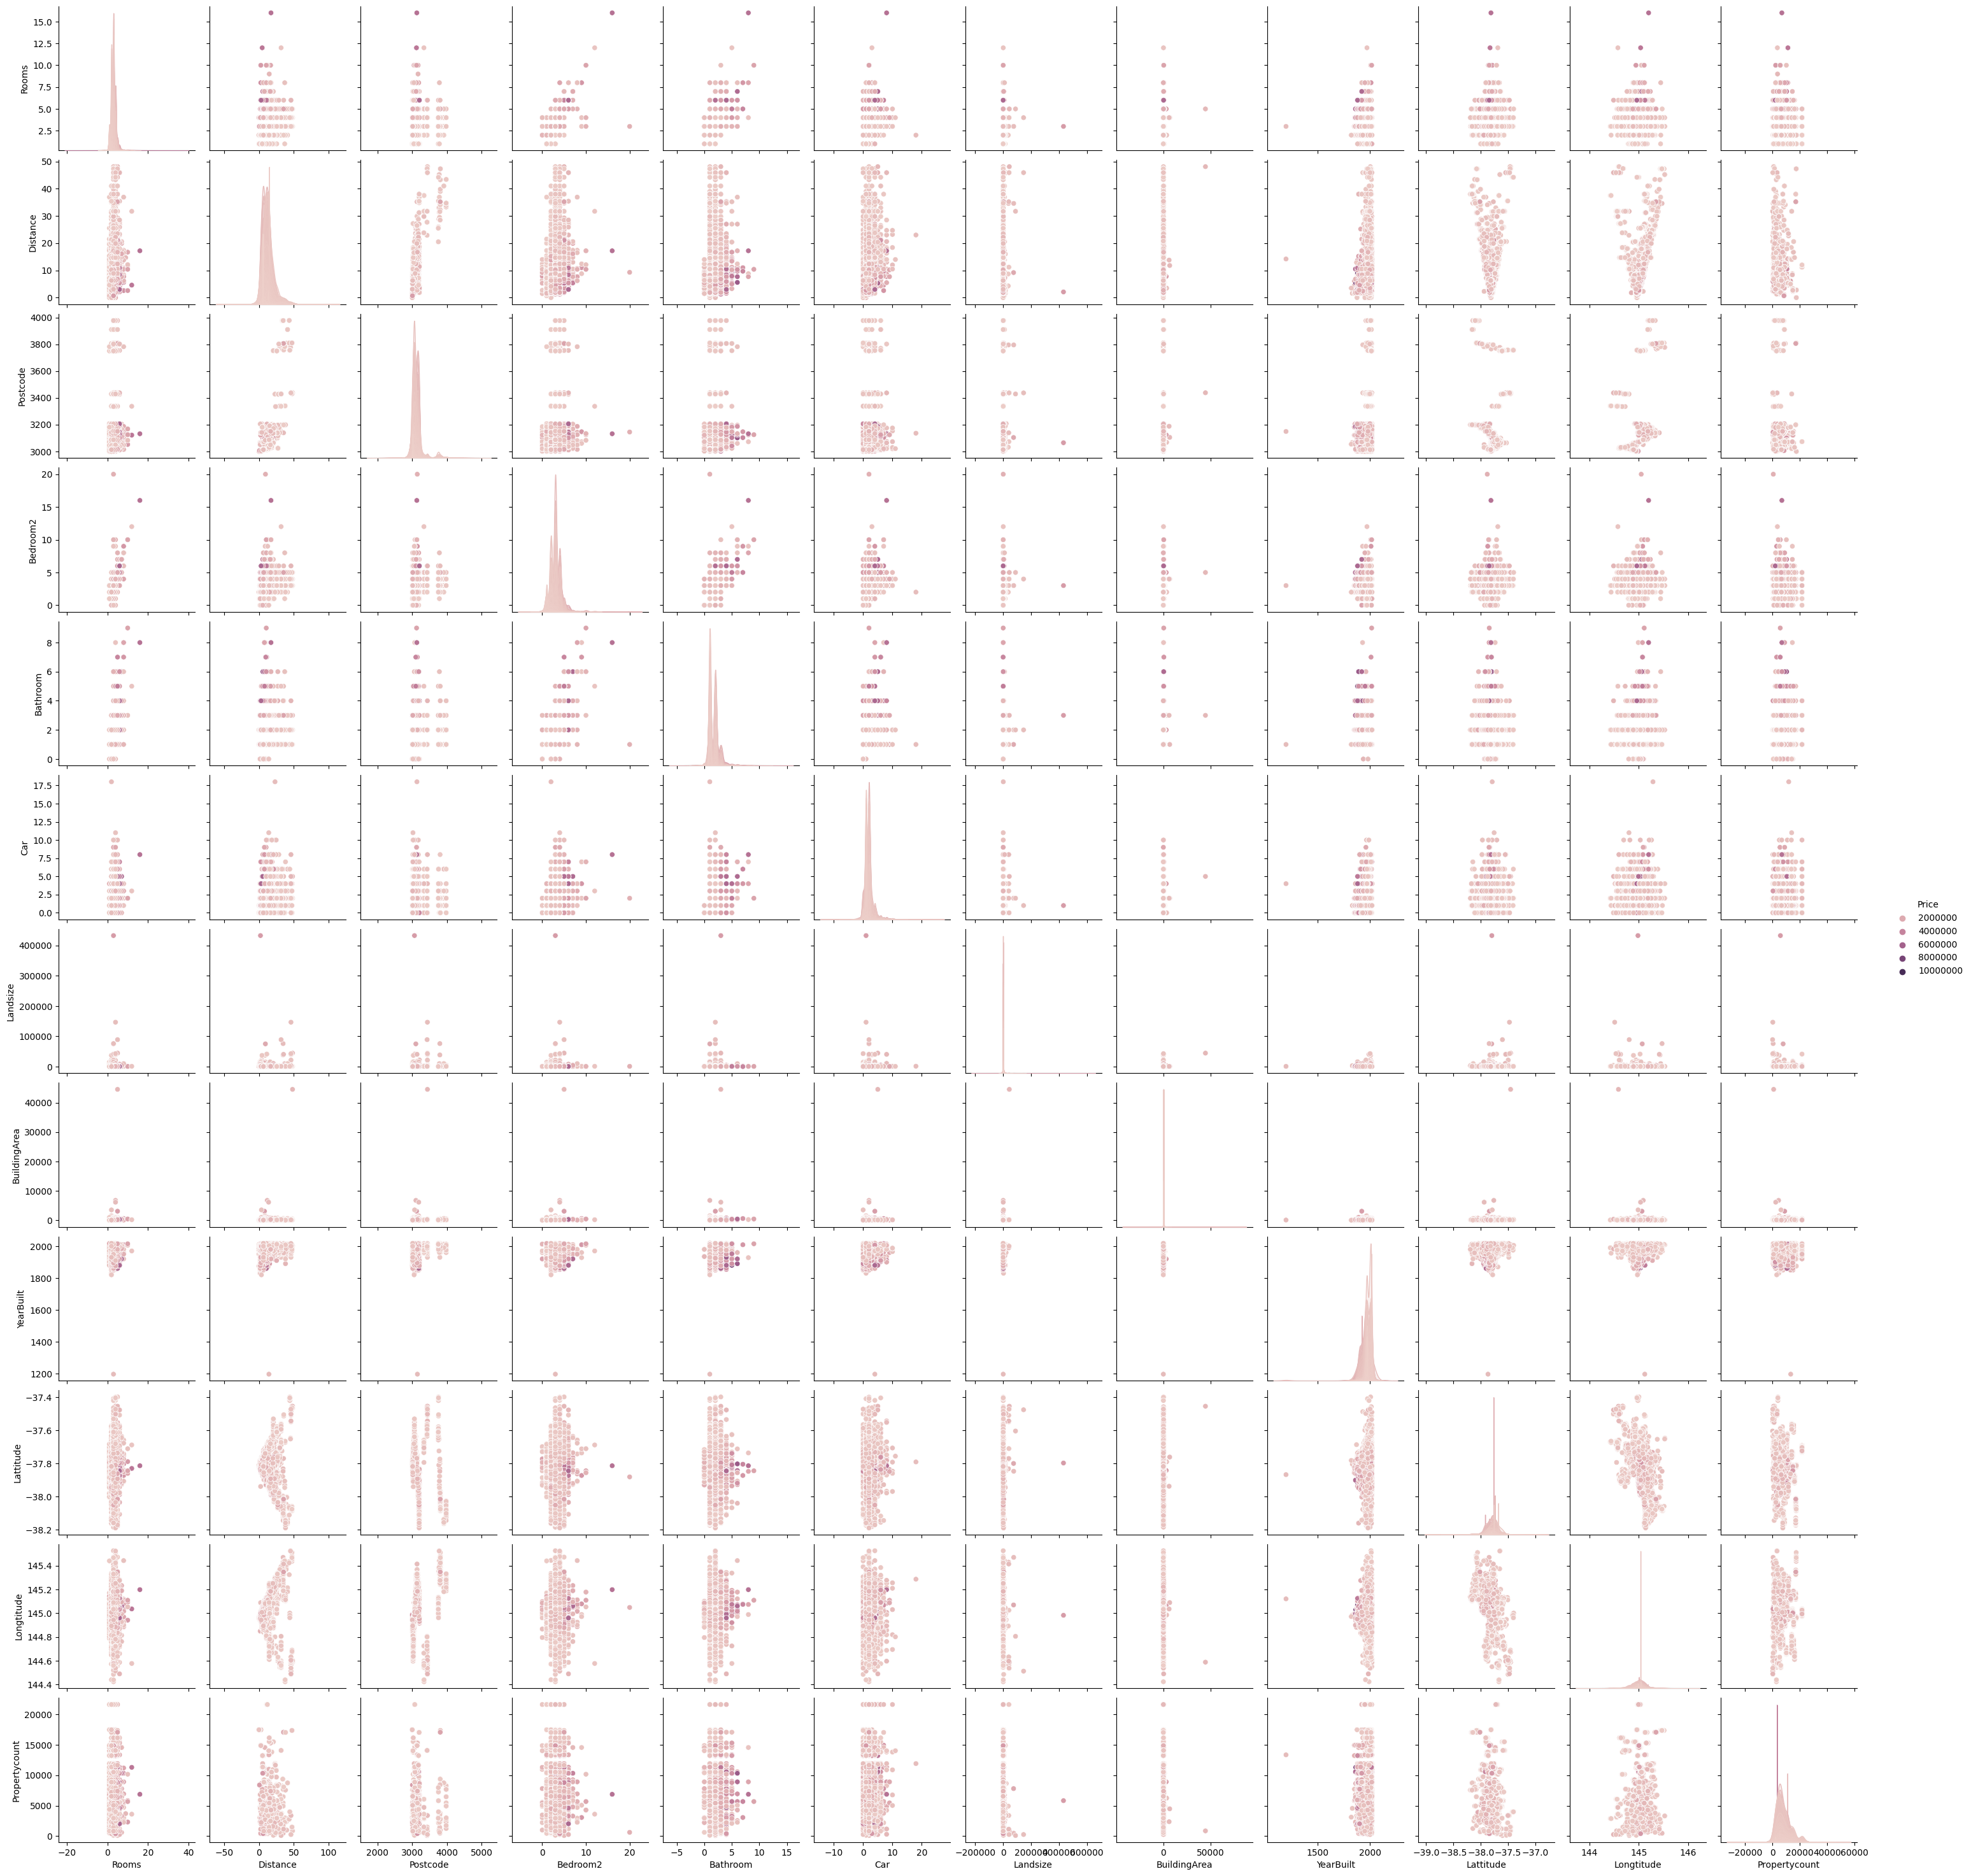

In [23]:
sns.pairplot(dff[num_cols], hue="Price")

# 1.3 Target Analysis with Categorical Variables

In [24]:
def target_vs_cat(dataframe, target, categorical_col):
    target_df = pd.DataFrame({"target_mean": dataframe.groupby(categorical_col)[target].mean()})
    print(target_df, end="\n\n\n")


for col in cat_cols:
    target_vs_cat(dff, "Price", col)

      target_mean
Type             
h      1203718.50
t       931077.22
u       627943.42


        target_mean
Method             
PI       1117883.99
PN              NaN
S        1051459.91
SA        982504.67
SN              NaN
SP        879022.37
SS              NaN
VB       1194205.29
W               NaN


                            target_mean
Regionname                             
Eastern Metropolitan         1108723.00
Eastern Victoria              714328.20
Northern Metropolitan         861484.05
Northern Victoria             619051.20
South-Eastern Metropolitan    877682.68
Southern Metropolitan        1395928.33
Western Metropolitan          837615.32
Western Victoria              432606.77




# 1.4 Correlation Matrix

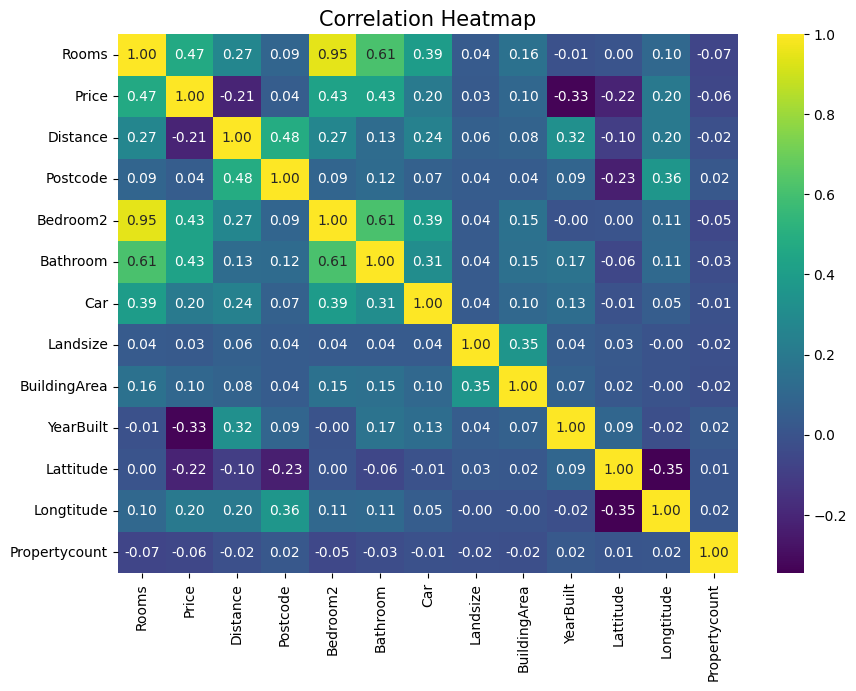

In [25]:
corr = dff[num_cols].corr()
f, ax = plt.subplots(figsize=[10, 7])
ax.set_title("Correlation Heatmap", fontsize=15)
sns.heatmap(corr, annot=True, fmt=".2f", ax=ax, cmap="viridis")
plt.show()

In [26]:
dff[num_cols].corrwith(dff["Price"]).sort_values(ascending=False)

Price            1.00
Rooms            0.47
Bedroom2         0.43
Bathroom         0.43
Car              0.20
Longtitude       0.20
BuildingArea     0.10
Postcode         0.04
Landsize         0.03
Propertycount   -0.06
Distance        -0.21
Lattitude       -0.22
YearBuilt       -0.33
dtype: float64

# 2. Data Pre-processing & Feature Engineering

# 2.1 Outlier Detection

## Outlier Observation with IQR Method

In [27]:
def outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    quantile1 = dataframe[variable].quantile(q1)
    quantile3 = dataframe[variable].quantile(q3)
    interquantile_range = quantile3 - quantile1
    up_limit = quantile3 + 1.5 * interquantile_range
    low_limit = quantile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [28]:
def check_outlier(dataframe, column):
    low_limit, up_limit = outlier_thresholds(dataframe, column)
    
    if dataframe[(dataframe[column] > up_limit) | (dataframe[column] < low_limit)].any(axis=None):
        return True
    
    else:
        return False
    

for col in num_cols:
    print(col, check_outlier(dff, col))

Rooms True
Price True
Distance False
Postcode True
Bedroom2 True
Bathroom True
Car True
Landsize True
BuildingArea True
YearBuilt True
Lattitude False
Longtitude False
Propertycount False


## Visual Outlier Observation with Boxplot

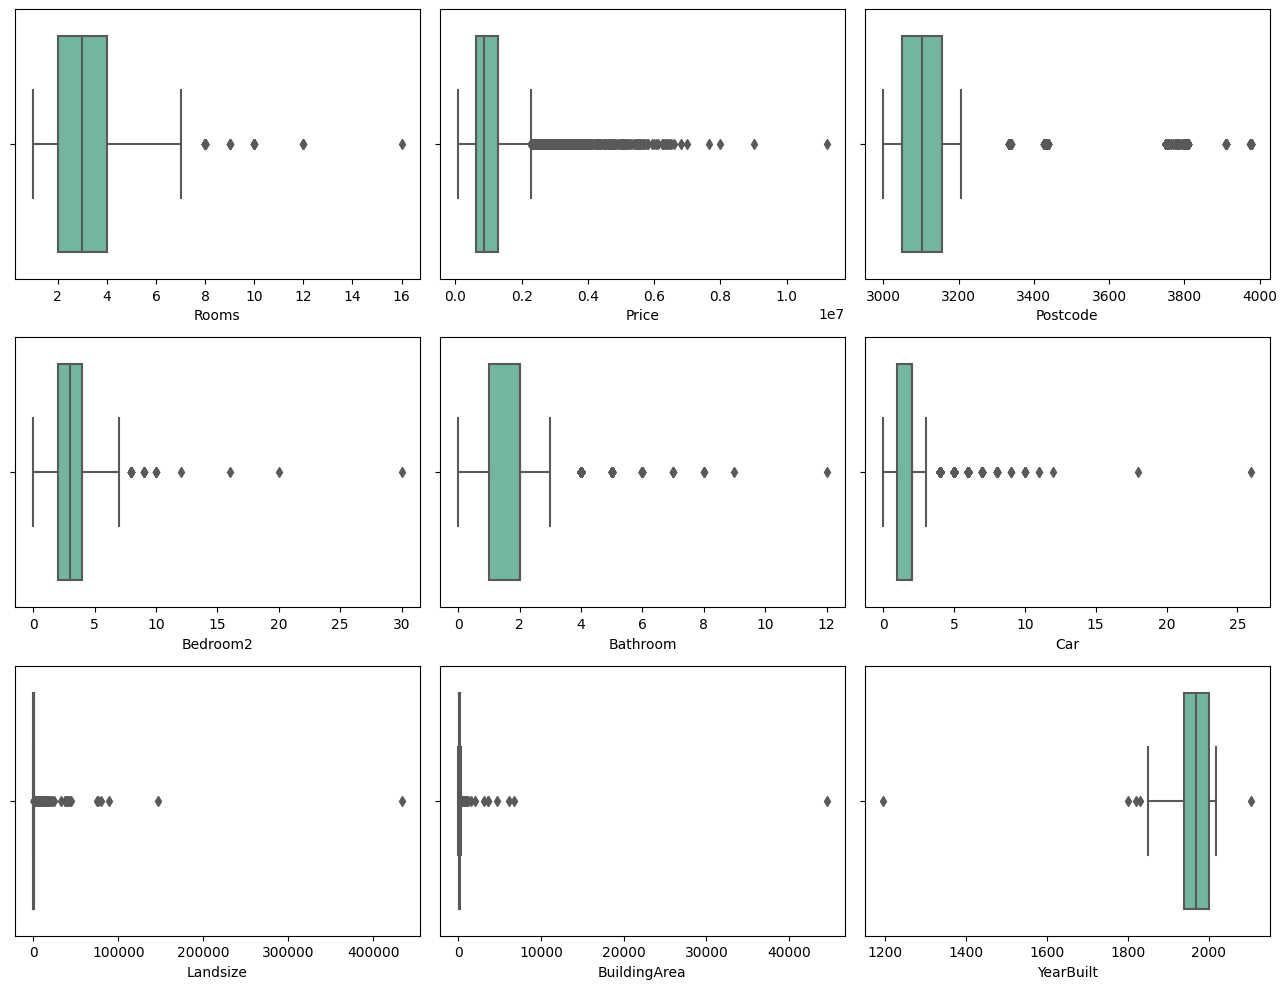

In [29]:
plt.figure(figsize=(13, 10))

plt.subplot(3, 3, 1)
sns.boxplot(x=dff["Rooms"])
plt.subplot(3, 3, 2)
sns.boxplot(x=dff["Price"])
plt.subplot(3, 3, 3)
sns.boxplot(x=dff["Postcode"])
plt.subplot(3, 3, 4)
sns.boxplot(x=dff["Bedroom2"])
plt.subplot(3, 3, 5)
sns.boxplot(x=dff["Bathroom"])
plt.subplot(3, 3, 6)
sns.boxplot(x=dff["Car"])
plt.subplot(3, 3, 7)
sns.boxplot(x=dff["Landsize"])
plt.subplot(3, 3, 8)
sns.boxplot(x=dff["BuildingArea"])
plt.subplot(3, 3, 9)
sns.boxplot(x=dff["YearBuilt"])

plt.tight_layout()
plt.show()

In [30]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(dff, col)

In [31]:
for col in num_cols:
    print(col, check_outlier(dff, col))

Rooms False
Price False
Distance False
Postcode False
Bedroom2 False
Bathroom False
Car False
Landsize False
BuildingArea False
YearBuilt False
Lattitude False
Longtitude False
Propertycount False


# 2.2 Missing Values

In [32]:
def missing_values(dataframe, na_name=False):
    # find columns with missing values
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    
    # calculate missing value statistics
    n_missing = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (n_missing / dataframe.shape[0] * 100).sort_values(ascending=False)
    
    # create and print a DataFrame to display missing value information
    missing_df = pd.concat([n_missing, np.round(ratio, 2)],
                           axis=1, keys=['n_missing', 'ratio'])
    print(missing_df)
    
    # return columns with missing values if na_name is True
    if na_name:
        return na_columns
    
    
missing_values(dff)

               n_missing  ratio
BuildingArea       21115  60.58
YearBuilt          19306  55.39
Landsize           11810  33.88
Car                 8728  25.04
Bathroom            8226  23.60
Bedroom2            8217  23.57
Lattitude           7976  22.88
Longtitude          7976  22.88
Price               7609  21.83
CouncilArea            3   0.01
Regionname             3   0.01
Propertycount          3   0.01
Distance               1   0.00
Postcode               1   0.00


In [33]:
for col in cat_cols:
    dff[col] = dff[col].fillna(dff[col].mode().iloc[0])

In [34]:
missing_values(dff)

               n_missing  ratio
BuildingArea       21115  60.58
YearBuilt          19306  55.39
Landsize           11810  33.88
Car                 8728  25.04
Bathroom            8226  23.60
Bedroom2            8217  23.57
Lattitude           7976  22.88
Longtitude          7976  22.88
Price               7609  21.83
CouncilArea            3   0.01
Propertycount          3   0.01
Distance               1   0.00
Postcode               1   0.00


In [35]:
for col in num_cols:
    if col not in ["BuildingArea", "Price"]:
        dff[col].fillna(dff[col].median(), inplace=True)

In [36]:
missing_values(dff)

              n_missing  ratio
BuildingArea      21115  60.58
Price              7609  21.83
CouncilArea           3   0.01


In [37]:
# building area is dropped due to the high correlation and the high rate of missing values
dff.drop('BuildingArea', axis=1, inplace=True)

In [38]:
dff["CouncilArea"].fillna(dff["CouncilArea"].mode().iloc[0], inplace=True)
dff = dff.dropna(subset=['Price'])

In [39]:
missing_values(dff)

Empty DataFrame
Columns: [n_missing, ratio]
Index: []


# 2.3 Rare Analysis

In [40]:
def rare_analyser(dataframe, target, categorical_columns):
    """
    Analyzes rare categories in categorical columns with respect to a target column.

    Parameters
    ------
        dataframe: pd.DataFrame
                   DataFrame containing the data.
        target: str
                The name of the target column.
        cat_cols: list
                  List of categorical variable names.
    Returns
    ------
        None
    """
    for col in cat_cols:
        value_counts = dataframe[col].value_counts()
        ratio = value_counts / len(dataframe)
        target_mean = dataframe.groupby(col)[target].mean()
        
        print(f"{col}:", len(value_counts))

        rare_df = pd.DataFrame({"COUNT": value_counts,
                                "RATIO": ratio,
                                "TARGET_MEAN": target_mean})

        print(rare_df, end="\n\n\n")
        
        
rare_analyser(dff, "Price", cat_cols)

Type: 3
   COUNT  RATIO  TARGET_MEAN
h  18472   0.68   1201021.36
t   2866   0.11    931077.22
u   5909   0.22    627690.00


Method: 5
    COUNT  RATIO  TARGET_MEAN
PI   3255   0.12   1115122.09
S   17515   0.64   1050042.04
SA    190   0.01    982504.67
SP   3603   0.13    878516.54
VB   2684   0.10   1188366.06


Regionname: 8
                            COUNT  RATIO  TARGET_MEAN
Eastern Metropolitan         3272   0.12   1108723.00
Eastern Victoria              166   0.01    714328.20
Northern Metropolitan        7864   0.29    861159.47
Northern Victoria             166   0.01    619051.20
South-Eastern Metropolitan   1341   0.05    874701.70
Southern Metropolitan        8527   0.31   1390439.21
Western Metropolitan         5815   0.21    837615.32
Western Victoria               96   0.00    432606.77




# 2.4 Feature Extraction

In [41]:
dff["Date"] = str(dff["Date"]).split("/")[2][0:4]
dff["Date"] = dff["Date"].apply(pd.to_numeric, errors='coerce')

In [42]:
dff["NEW_Total_Room"] = dff.Rooms + dff.Bedroom2 + dff.Bathroom

dff["NEW_Building_Age"] = dff.Date - dff.YearBuilt

dff["NEW_Region"] = dff["Regionname"].apply(lambda x: 1 if "Metropolitan" in x else 0)

In [43]:
dff.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,NEW_Total_Room,NEW_Building_Age,NEW_Region
1,Abbotsford,85 Turner St,2.00,h,1480000.00,S,Biggin,2016,2.50,3067.00,2.00,1.00,1.00,202.00,1970.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,5.00,46.00,1
2,Abbotsford,25 Bloomburg St,2.00,h,1035000.00,S,Biggin,2016,2.50,3067.00,2.00,1.00,0.00,156.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,5.00,116.00,1
4,Abbotsford,5 Charles St,3.00,h,1465000.00,SP,Biggin,2016,2.50,3067.00,3.00,2.00,0.00,134.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,8.00,116.00,1
5,Abbotsford,40 Federation La,3.00,h,850000.00,PI,Biggin,2016,2.50,3067.00,3.00,2.00,1.00,94.00,1970.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,8.00,46.00,1
6,Abbotsford,55a Park St,4.00,h,1600000.00,VB,Nelson,2016,2.50,3067.00,3.00,1.00,2.00,120.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,8.00,2.00,1


# 2.5 Encoding

In [44]:
cat_cols, num_cols, cat_but_car = grab_col_names(dff)

Observations: 27247
Variables: 23
Categorical Columns: 6
Numerical Columns: 13
Cardinals: 4
Numeric but Categoricals: 3


In [45]:
dff.shape

(27247, 23)

## Label Encoding

In [46]:
def label_encoder(dataframe, le_col):
    labelencoder = LabelEncoder()
    dataframe[le_col] = labelencoder.fit_transform(dataframe[le_col])
    return dataframe


for col in cat_cols:
    label_encoder(dff, col)

## One Hot Encoding

In [47]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe,
                               columns=categorical_cols,
                               drop_first=drop_first)
    return dataframe


dff = one_hot_encoder(dff, cat_but_car, drop_first=True)

# 2.6 Feature Scaling

In [48]:
scaler = StandardScaler()
dff[num_cols] = scaler.fit_transform(dff[num_cols])

# 3. Modelling

# 3.1 Base Model

In [49]:
models = [("Linear Regression", LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ("KNeighborsRegressor", KNeighborsRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("AdaBoostRegressor", AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state=13))]

In [50]:
y = dff["Price"]
X = dff.drop(["Price"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name})")

# 3.2 Hyperparameter Optimization

# 3.3 Feature Importance

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_,
                                'Feature': features.columns})
    
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    if save:
        plt.savefig('importances.png')
        

plot_importance(xgb_final, X_train)

## *!!! Project will be proceeded*